# Importing Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data=pd.read_csv('../data/Weather_vs_Pixel_Area_7days.csv')
data.head()

,Unnamed: 0,BME280_Humidity,BME280_Pressure,BME280_Temp,Intensity,Potato_Area,Spinach_Area
0,0,1.000000,0.739124,1.000000,1.000000,0.931285,0.365675
1,1,0.967659,0.709110,0.996632,0.959350,0.642971,0.349312
2,2,0.936402,0.683189,0.992992,0.922397,0.487944,0.276582
3,3,0.909391,0.662725,0.987886,0.886061,0.637705,0.379229
4,4,0.885993,0.645293,0.980417,0.850078,0.759042,0.444082


In [4]:
data=data.drop('Unnamed: 0',1)

In [6]:
round(data.corr(),3)

,BME280_Humidity,BME280_Pressure,BME280_Temp,Intensity,Potato_Area,Spinach_Area
BME280_Humidity,1.000,0.747,0.364,0.667,0.697,0.198
BME280_Pressure,0.747,1.000,0.403,0.572,0.457,0.192
BME280_Temp,0.364,0.403,1.000,0.907,0.380,-0.133
Intensity,0.667,0.572,0.907,1.000,0.606,0.017
Potato_Area,0.697,0.457,0.380,0.606,1.000,0.661
Spinach_Area,0.198,0.192,-0.133,0.017,0.661,1.000


In [7]:
x=data[['BME280_Humidity','BME280_Pressure','BME280_Temp','Intensity']]
y=data['Potato_Area']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,random_state=100)

In [9]:
x_train_sm=x_train
y_train_sm=y_train
x_train_sm=sm.add_constant(x_train_sm)
lm_1=sm.OLS(y_train_sm,x_train_sm).fit()

In [10]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:            Potato_Area   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     17.34
Date:                Fri, 03 Jul 2020   Prob (F-statistic):           1.51e-09
Time:                        19:04:22   Log-Likelihood:                 11.606
No. Observations:                  66   AIC:                            -13.21
Df Residuals:                      61   BIC:                            -2.263
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0457      0.096     

# Checking Multicollinearity via VIF

In [11]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [12]:
vif_cal(input_data=data, dependent_col="Potato_Area")

,Var,Vif
3,Intensity,26.10
2,BME280_Temp,19.91
0,BME280_Humidity,18.76
1,BME280_Pressure,14.57
4,Spinach_Area,3.58


In [13]:
# p and VIF for pressure are high. drop it
x_train_sm=x_train_sm.drop('BME280_Pressure',1)

In [16]:
x_train_sm.head()

,const,BME280_Humidity,BME280_Temp,Intensity
97,1.0,0.378834,0.086916,0.039975
40,1.0,0.289986,0.784746,0.401514
81,1.0,0.410994,0.162099,0.130874
100,1.0,0.409097,0.068664,0.084001
64,1.0,0.253128,0.350083,0.103314


In [17]:
lm_2 = sm.OLS(y_train_sm,x_train_sm).fit()

In [18]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:            Potato_Area   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     23.40
Date:                Fri, 03 Jul 2020   Prob (F-statistic):           3.00e-10
Time:                        19:08:01   Log-Likelihood:                 11.536
No. Observations:                  66   AIC:                            -15.07
Df Residuals:                      62   BIC:                            -6.313
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0435      0.095     

In [19]:
vif_cal(input_data=data.drop(["BME280_Pressure"], axis=1), dependent_col="Potato_Area")

,Var,Vif
2,Intensity,23.31
1,BME280_Temp,16.12
0,BME280_Humidity,8.53
3,Spinach_Area,3.45


In [20]:
# VIf and p for temperature are high. Drop it
x_train_sm=x_train_sm.drop('BME280_Temp',1)

In [21]:
x_train_sm

,const,BME280_Humidity,Intensity
97,1.0,0.378834,0.039975
40,1.0,0.289986,0.401514
81,1.0,0.410994,0.130874
100,1.0,0.409097,0.084001
64,1.0,0.253128,0.103314
...,...,...,...
87,1.0,0.344505,0.143905
103,1.0,0.431817,0.132283
67,1.0,0.340079,0.027648
24,1.0,0.583089,0.621467


In [22]:
lm_3 = sm.OLS(y_train_sm,x_train_sm).fit()

In [23]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:            Potato_Area   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     34.07
Date:                Fri, 03 Jul 2020   Prob (F-statistic):           9.35e-11
Time:                        19:09:52   Log-Likelihood:                 10.741
No. Observations:                  66   AIC:                            -15.48
Df Residuals:                      63   BIC:                            -8.914
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0525      0.054     

In [24]:
vif_cal(input_data=data.drop(["BME280_Pressure","BME280_Temp"], axis=1), dependent_col="Potato_Area")

,Var,Vif
0,BME280_Humidity,7.63
1,Intensity,4.73
2,Spinach_Area,3.11


In [25]:
print(lm_3.params)

const             -0.052490
BME280_Humidity    0.589429
Intensity          0.334001
dtype: float64


In [26]:
x_test=x_test.drop(["BME280_Pressure","BME280_Temp"],1)
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,BME280_Humidity,Intensity
25,1.0,0.566105,0.610842
51,1.0,0.020913,0.317866
21,1.0,0.643164,0.654310
26,1.0,0.549121,0.601068
68,1.0,0.383125,0.008277


In [28]:
#Making Predictions
y_pred=lm_3.predict(x_test_sm)

In [30]:
c=[i for i in range(1,len(y_pred)+1)]

Text(0, 0.5, 'Potato Area')

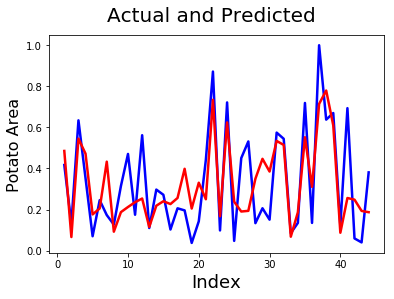

In [33]:
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Potato Area', fontsize=16)

Text(0, 0.5, 'ytest-ypred')

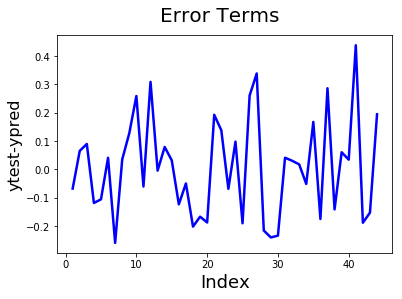

In [34]:
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16) 

In [35]:
mse=mean_squared_error(y_test,y_pred)
mse

0.030242642331652317